<a href="https://colab.research.google.com/github/Alvamad/miaa-eda1/blob/main/Pr%C3%A1ctica_Webscrapping_Alvaro_Acosta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Debemos importar la librería requests y BeautifulSoup, asumiendo que estas ya se encuentran instaladas en el entorno de colab. También importandos pandas para en análisis de la información posterior al scrapping.

In [22]:
# Importar las librerías necesarias
import requests
from bs4 import BeautifulSoup
import pandas as pd

La página tiene una estructura estática en la que hay un listado de 1000 libros divididos en páginas de a 20 ocurrencias. Por lo tanto un total de 50 páginas.

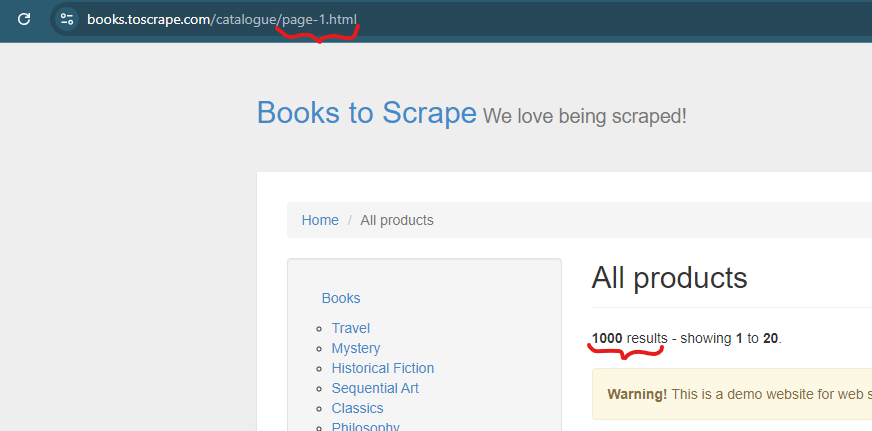

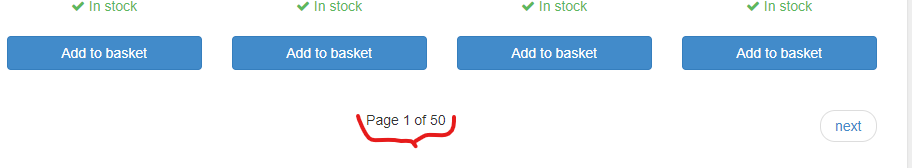

Cada libro tiene la siguiente estructura de clases de etiquetas:

*   **product_pod**: Que contiene la información del libro
 * **title**: Que contiene la información del título del libro
 *   **star_rating {rating}**: Que contiene la información de Rating del libro representada por {rating} que es un valor dinámico asignado dependiendo del rating. Por ejemplo para un libro de rating 3 la clase sería: **star_rating Three**
 * **price_color**: Que contiene la información del precio del libro, siempre con el sígno de libras esterlinas £ como prefijo
 * **instock availability**: Que contiene si el libro está en stock o no. En este caso asumiría que _availablity_ también es dinámico, pero todos los libros se encuentran en stock.

Dicho esto, procedemos con el código para:
1. Recorrer de manera iterativa las 50 páginas
2. Inicializar un diccionario de conversión para pasar la calificación de letras a números (e.j. Four = 4)
3. Crear las variables para almacenar la información del DF que posteriormente vamos a utilizar.


In [23]:
# URL base y número total de páginas
base_url = "https://books.toscrape.com/catalogue/page-{}.html"
total_pages = 50  # 1000 libros / 20 libros por página = 50 páginas

# Diccionario para convertir la clasificación de texto a numérica
rating_conversion = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

# Crear las listas para inicializar los datos
titles = []
prices = []
availabilities = []
ratings = []

Ahora iteramos por las páginas:
1. Construyendo la URL para poder utilizar soup.
2. Buscando todos los product_pod (es decir, todos los libros)
3. Buscando las etiquetas que se mencionaron arriba
4. Guardando la información en las listas inicializadas
5. Imprimiendo lo requerido por el ejercicio: Título, precio, disponibilidad y rating.

In [24]:
# Iterar a través de todas las páginas
for page_num in range(1, total_pages + 1):

    # Construir la URL para la página actual
    url = base_url.format(page_num)

    # Obtener un requests de la URL
    site = requests.get(url)

    # Si el Status Code es OK!
    if site.status_code == 200:
      # Hacer al Site un soup
      soup = BeautifulSoup(site.text, 'html.parser')

      # Buscamos todos los libros
      products = soup.find_all(attrs={"class": "product_pod"})

      for product in products:

        # Titulo (en este caso está dentro de un 'h3' y un 'a'), y traemos el valor del atributo Title (no del contenido)
        title = product.find('h3').find('a')['title']

        # Precio
        price = product.find(attrs={'class':'price_color'}).text

        # El precio tiene la particularidad del prefijo, nos toca eliminarlo
        # para poder hacer el parsing a float.
        price = float(price[1:].replace('£', ''))

        # Disponibilidad
        availability = product.find(attrs={'class':'instock availability'}).text.strip()

        # Rating (está dentro de un 'p' y obtenemos la segunda posición para traer el valor en letras)
        rating_element = product.find('p', class_='star-rating')
        rating_class = rating_element['class'][1]

        # Convertimos el precio de letras a números con el diccionario
        rating = rating_conversion.get(rating_class)

        # Y le añadimos un toque visual con las estrellas como tal.
        rating_stars = '⭐' * rating

        # Guardamos la información en las listas
        titles.append(title)
        prices.append(price)
        availabilities.append(availability)
        ratings.append(rating)

        # Imprimimos la información de cada libro (serán 1000 al final)
        print(f"Title: {title}")
        print(f"Price: £{price}")
        print(f"Availability: {availability}")
        print(f"Rating: {rating_stars}")
        print("-" * 20)

Title: A Light in the Attic
Price: £51.77
Availability: In stock
Rating: ⭐⭐⭐
--------------------
Title: Tipping the Velvet
Price: £53.74
Availability: In stock
Rating: ⭐
--------------------
Title: Soumission
Price: £50.1
Availability: In stock
Rating: ⭐
--------------------
Title: Sharp Objects
Price: £47.82
Availability: In stock
Rating: ⭐⭐⭐⭐
--------------------
Title: Sapiens: A Brief History of Humankind
Price: £54.23
Availability: In stock
Rating: ⭐⭐⭐⭐⭐
--------------------
Title: The Requiem Red
Price: £22.65
Availability: In stock
Rating: ⭐
--------------------
Title: The Dirty Little Secrets of Getting Your Dream Job
Price: £33.34
Availability: In stock
Rating: ⭐⭐⭐⭐
--------------------
Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price: £17.93
Availability: In stock
Rating: ⭐⭐⭐
--------------------
Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price: £22.6
Availability: 

Ahora inicializamos el dataframe con las listas que almacenaron la información de todos los libros

In [25]:
#Dataframe con toda la info
df = pd.DataFrame({
    'Title': titles,
    'Price': prices,
    'Availability': availabilities,
    'Rating': ratings
    })

Y finalmente hacemos algo de análisis de la información, por ejemplo, cuál es el libro más costoso.

In [27]:
most_expensive_book = df.loc[df['Price'].idxmax()]
print(f"El libro más costoso es: {most_expensive_book['Title']}. Precio: £{most_expensive_book['Price']}")

El libro más costoso es: The Perfect Play (Play by Play #1). Precio: £59.99


O por ejemplo, cuántos libros hay con cada rating:

In [32]:
# Contar libros por rating
rating_counts = df['Rating'].value_counts().sort_index()

# Mostrar el conteo de libros para cada rating
for rating, count in rating_counts.items():
    print(f"Cantidad de libros con {'⭐'*rating}: {count}")

Cantidad de libros con ⭐: 226
Cantidad de libros con ⭐⭐: 196
Cantidad de libros con ⭐⭐⭐: 203
Cantidad de libros con ⭐⭐⭐⭐: 179
Cantidad de libros con ⭐⭐⭐⭐⭐: 196
